In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import Dataset

trainloader = Dataset.trainloader
testloader =  Dataset.testloader
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


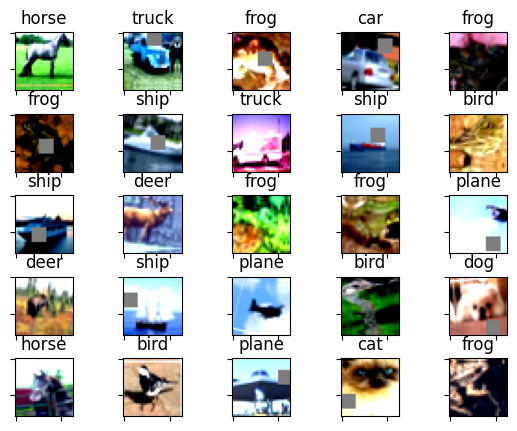

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print labels
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,25):
 plt.subplot(5, 5, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((images[i]/2)+0.5).numpy(),(1,2,0)))
 plt.title(classes[labels[i]])

#Network

In [5]:
import custom_resnet
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = custom_resnet.Net('bn').to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.87E-02


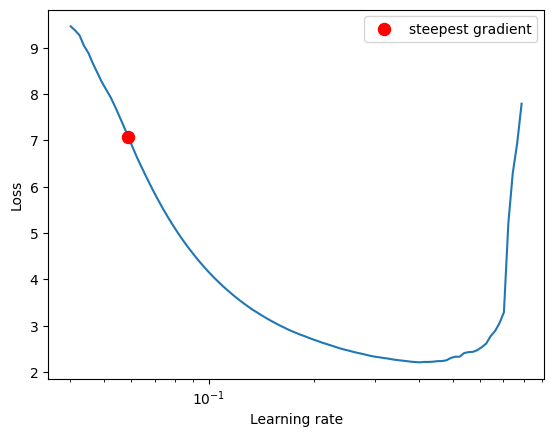

In [6]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
from torch_lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.03, weight_decay=1e-4)
lr_finder = LRFinder(net, optimizer, criterion, device='cuda')
lr_finder.range_test(trainloader,end_lr=10, num_iter=200, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

In [7]:
import torch
from torch.optim import lr_scheduler

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=5.87E-02, steps_per_epoch=1, epochs=26, pct_start=0.25, div_factor=100, final_div_factor=100, three_phase=False, anneal_strategy='linear')

In [8]:
import torch
from tqdm import tqdm
import traine, teste
#import test
test_acc = []
train_acc = []
learning_rate = []
for epoch in range(24):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
    learning_rate.append(param_group['lr'])
print('Finished Training')

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


lr=  0.011153000000000001


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 98/98 [00:39<00:00,  2.50it/s]


Epoch= 0 Loss=1.8910863399505615 Accuracy=33.63


100%|██████████| 20/20 [00:07<00:00,  2.53it/s]


Accuracy of the network on the 10000 test images: 37.66 %
lr=  0.021719000000000002


100%|██████████| 98/98 [00:38<00:00,  2.55it/s]


Epoch= 1 Loss=1.36386239528656 Accuracy=57.74


100%|██████████| 20/20 [00:05<00:00,  3.61it/s]


Accuracy of the network on the 10000 test images: 54.42 %
lr=  0.032284999999999994


100%|██████████| 98/98 [00:38<00:00,  2.55it/s]


Epoch= 2 Loss=1.0925629138946533 Accuracy=66.96


100%|██████████| 20/20 [00:05<00:00,  3.64it/s]


Accuracy of the network on the 10000 test images: 63.89 %
lr=  0.042851


100%|██████████| 98/98 [00:40<00:00,  2.42it/s]


Epoch= 3 Loss=0.9155621528625488 Accuracy=73.81


100%|██████████| 20/20 [00:08<00:00,  2.45it/s]


Accuracy of the network on the 10000 test images: 69.77 %
lr=  0.053417


100%|██████████| 98/98 [00:39<00:00,  2.50it/s]


Epoch= 4 Loss=0.9548577070236206 Accuracy=78.87


100%|██████████| 20/20 [00:05<00:00,  3.49it/s]


Accuracy of the network on the 10000 test images: 76.06 %
lr=  0.05719502230769231


100%|██████████| 98/98 [00:39<00:00,  2.49it/s]


Epoch= 5 Loss=0.7332186698913574 Accuracy=81.25


100%|██████████| 20/20 [00:06<00:00,  3.15it/s]


Accuracy of the network on the 10000 test images: 76.37 %
lr=  0.054185066923076924


100%|██████████| 98/98 [00:41<00:00,  2.38it/s]


Epoch= 6 Loss=0.6151382923126221 Accuracy=89.29


100%|██████████| 20/20 [00:06<00:00,  3.19it/s]


Accuracy of the network on the 10000 test images: 80.50 %
lr=  0.05117511153846154


100%|██████████| 98/98 [00:39<00:00,  2.48it/s]


Epoch= 7 Loss=0.6621562242507935 Accuracy=86.31


100%|██████████| 20/20 [00:05<00:00,  3.52it/s]


Accuracy of the network on the 10000 test images: 82.30 %
lr=  0.04816515615384616


100%|██████████| 98/98 [00:42<00:00,  2.32it/s]


Epoch= 8 Loss=0.6101078987121582 Accuracy=85.71


100%|██████████| 20/20 [00:07<00:00,  2.78it/s]


Accuracy of the network on the 10000 test images: 80.08 %
lr=  0.04515520076923077


100%|██████████| 98/98 [00:38<00:00,  2.52it/s]


Epoch= 9 Loss=0.46381115913391113 Accuracy=90.77


100%|██████████| 20/20 [00:05<00:00,  3.53it/s]


Accuracy of the network on the 10000 test images: 83.52 %
lr=  0.042145245384615386


100%|██████████| 98/98 [00:40<00:00,  2.41it/s]


Epoch= 10 Loss=0.5505433082580566 Accuracy=89.58


100%|██████████| 20/20 [00:07<00:00,  2.54it/s]


Accuracy of the network on the 10000 test images: 85.04 %
lr=  0.03913529


100%|██████████| 98/98 [00:38<00:00,  2.52it/s]


Epoch= 11 Loss=0.3995591104030609 Accuracy=91.37


100%|██████████| 20/20 [00:05<00:00,  3.47it/s]


Accuracy of the network on the 10000 test images: 85.96 %
lr=  0.03612533461538461


100%|██████████| 98/98 [00:38<00:00,  2.52it/s]


Epoch= 12 Loss=0.39588332176208496 Accuracy=92.56


100%|██████████| 20/20 [00:06<00:00,  3.31it/s]


Accuracy of the network on the 10000 test images: 86.05 %
lr=  0.03311537923076923


100%|██████████| 98/98 [00:39<00:00,  2.45it/s]


Epoch= 13 Loss=0.3785838484764099 Accuracy=90.77


100%|██████████| 20/20 [00:07<00:00,  2.78it/s]


Accuracy of the network on the 10000 test images: 86.02 %
lr=  0.030105423846153848


100%|██████████| 98/98 [00:38<00:00,  2.56it/s]


Epoch= 14 Loss=0.31278032064437866 Accuracy=93.45


100%|██████████| 20/20 [00:05<00:00,  3.49it/s]


Accuracy of the network on the 10000 test images: 86.89 %
lr=  0.027095468461538465


100%|██████████| 98/98 [00:39<00:00,  2.49it/s]


Epoch= 15 Loss=0.370066374540329 Accuracy=91.37


100%|██████████| 20/20 [00:06<00:00,  3.21it/s]


Accuracy of the network on the 10000 test images: 87.95 %
lr=  0.024085513076923075


100%|██████████| 98/98 [00:38<00:00,  2.52it/s]


Epoch= 16 Loss=0.3392607867717743 Accuracy=91.67


100%|██████████| 20/20 [00:07<00:00,  2.84it/s]


Accuracy of the network on the 10000 test images: 88.18 %
lr=  0.021075557692307692


100%|██████████| 98/98 [00:38<00:00,  2.54it/s]


Epoch= 17 Loss=0.32504716515541077 Accuracy=92.56


100%|██████████| 20/20 [00:05<00:00,  3.54it/s]


Accuracy of the network on the 10000 test images: 89.38 %
lr=  0.01806560230769231


100%|██████████| 98/98 [00:39<00:00,  2.50it/s]


Epoch= 18 Loss=0.27241769433021545 Accuracy=92.86


100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


Accuracy of the network on the 10000 test images: 89.63 %
lr=  0.01505564692307692


100%|██████████| 98/98 [00:38<00:00,  2.54it/s]


Epoch= 19 Loss=0.3215314447879791 Accuracy=92.86


100%|██████████| 20/20 [00:05<00:00,  3.56it/s]


Accuracy of the network on the 10000 test images: 89.92 %
lr=  0.012045691538461543


100%|██████████| 98/98 [00:38<00:00,  2.56it/s]


Epoch= 20 Loss=0.3229105770587921 Accuracy=90.77


100%|██████████| 20/20 [00:05<00:00,  3.51it/s]


Accuracy of the network on the 10000 test images: 89.87 %
lr=  0.009035736153846154


100%|██████████| 98/98 [00:40<00:00,  2.44it/s]


Epoch= 21 Loss=0.2109854519367218 Accuracy=93.45


100%|██████████| 20/20 [00:06<00:00,  2.96it/s]


Accuracy of the network on the 10000 test images: 90.74 %
lr=  0.006025780769230764


100%|██████████| 98/98 [00:38<00:00,  2.52it/s]


Epoch= 22 Loss=0.2071652114391327 Accuracy=93.45


100%|██████████| 20/20 [00:05<00:00,  3.58it/s]


Accuracy of the network on the 10000 test images: 91.20 %
lr=  0.003015825384615388


100%|██████████| 98/98 [00:39<00:00,  2.45it/s]


Epoch= 23 Loss=0.19436150789260864 Accuracy=92.86


100%|██████████| 20/20 [00:08<00:00,  2.46it/s]

Accuracy of the network on the 10000 test images: 91.31 %
Finished Training


## Train/Test/LR curve

Text(0, 0.5, 'lr')

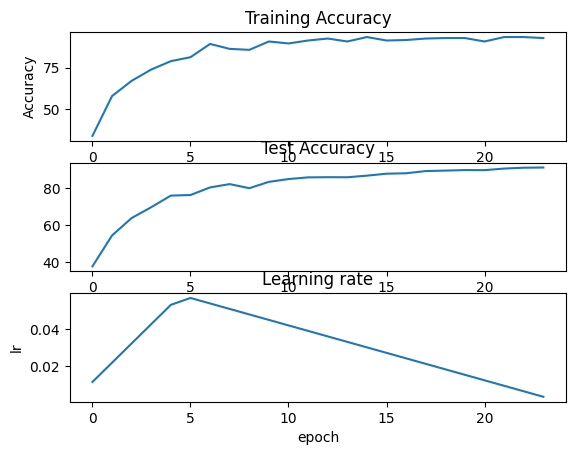

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[2].plot(learning_rate)
axs[2].set_title("Learning rate")
axs[2].set_xlabel("epoch")
axs[2].set_ylabel("lr")

## Misclassified Images

  0%|          | 0/20 [00:06<?, ?it/s]


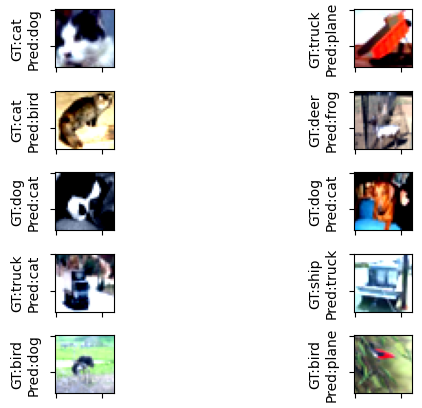

In [13]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.cpu().numpy()
           predicted1 = predicted.cpu().numpy()
           for i in range(512):
              if target1[i]!=predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))



## Correctly classified Images

  0%|          | 0/20 [00:06<?, ?it/s]


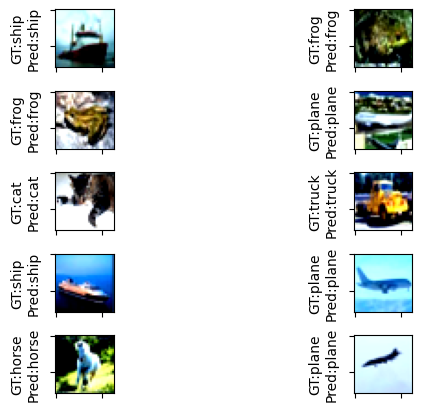

In [14]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.cpu().numpy()
           predicted1 = predicted.cpu().numpy()
           for i in range(512):
              if target1[i]==predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))

